In [15]:
#Importanbdo librerias de Python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [17]:
#lectura del archivo y vista de las 5 primeras filas
df=pd.read_csv("wine_reviews_dataset.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# definiendo ruta
path_to_data="./wine_reviews_dataset.csv"

In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [19]:
#clasificando variables
categoricas=["Unnamed: 0","country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery"]
numericas=(["points", "price"])

In [153]:
# creando nuev tabla df1: contiene country, points, price, variety, winery
df1 = df.drop (columns=["Unnamed: 0", "description", "province",  "designation", "taster_name", "taster_twitter_handle", "title"])
df1.head()


,country,points,price,region_1,region_2,variety,winery
0,Italy,87,NaN,Etna,NaN,White Blend,Nicosia
1,Portugal,87,0-300,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,87,0-300,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,87,0-300,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,87,0-300,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks


In [152]:
# Cuantos missing values hay en el dataset por cada columna
df1.isnull().sum()

country        63
points          0
price        8996
region_1    21247
region_2    79460
variety         1
winery          0
dtype: int64

<p> Hay muchos datos NaN para precio, </p>

In [8]:
# Principales descriptores estadisticos
df1.describe()


,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


<p> Observamos que hay una gran SD en los precios de los vinos, siendo el más barato 4 y el más caro 3300. 
De manera contraria la SD de los puntos es menor, siendo el puntake minimo 80 y maximo 100.</p>

<AxesSubplot:>

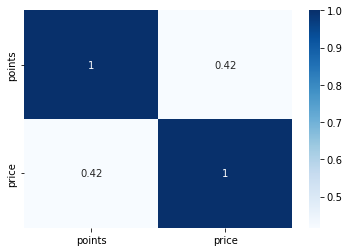

In [9]:
# Evaluando correlación entre precio y puntos
sns.heatmap(df1.corr(), annot=True, cmap='Blues')

<p> R = 0.42 => baja correlación entre puntaje y precio </p>

<AxesSubplot:xlabel='points', ylabel='price'>

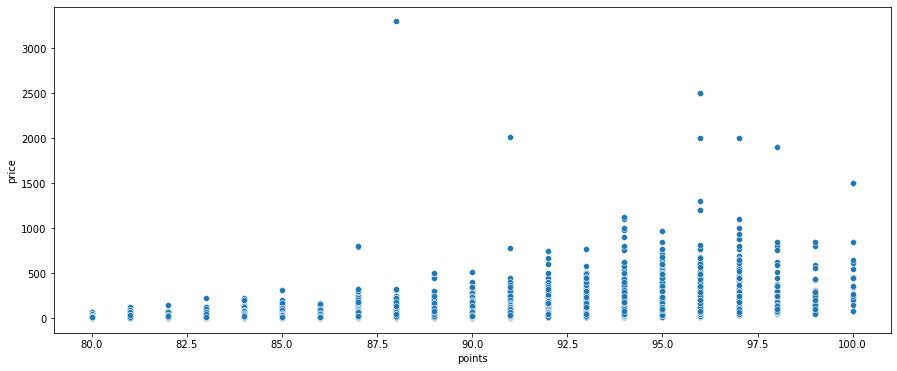

In [10]:
# Evaluando precios vs puntaje 
plt.figure(figsize=(15,6))
sns.scatterplot(data = df1, x= 'points', y ='price')

<p> Se observa que varios vinos más caros tienen más puntaje, pero también hay vinos baratos con muy buen puntaje.</p>

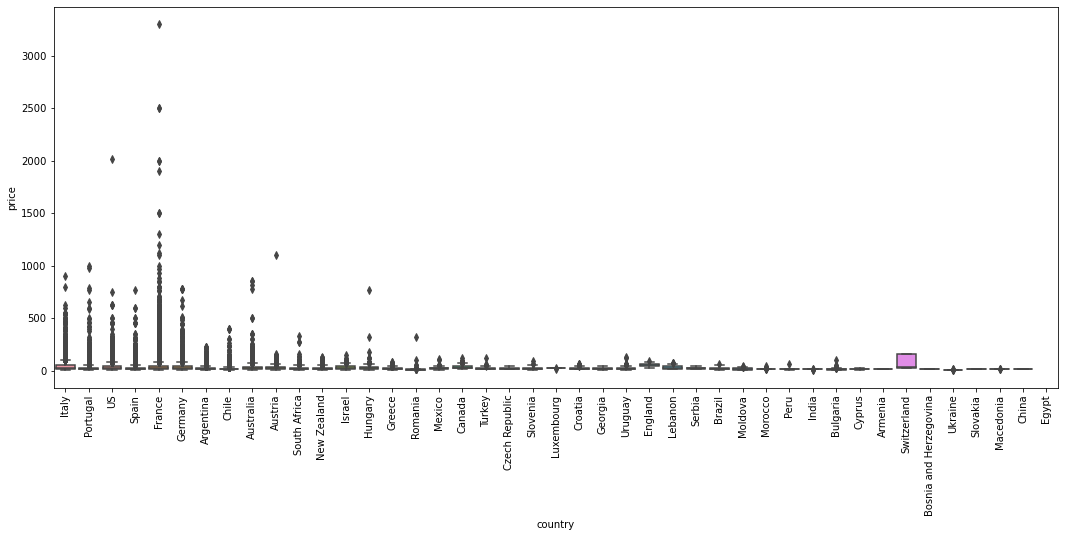

In [11]:
# Evaluando precios por país
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='country', data=df1, ax=ax)
plt.xticks(rotation=90)
plt.show()

<p> Los diagramas de caja están muy cerca uno del otro => difícil hacer una inferencia. 
Se observa que los vinos más caros provienen de paises como Francia (3300), US, Australia, Protugal, Italia, Españas </p>


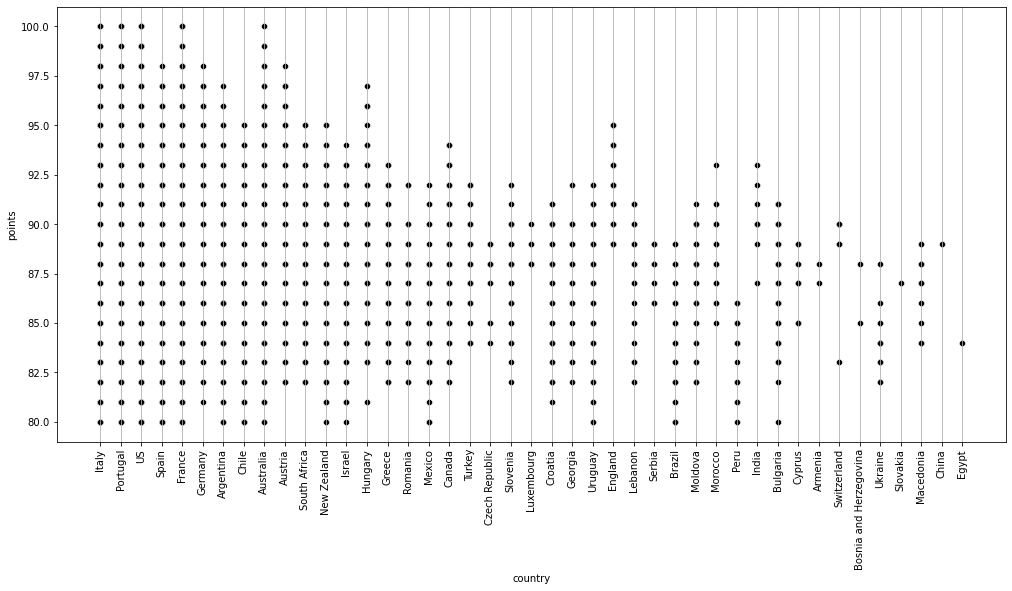

In [12]:
# Evaluando puntajes por país
plt.figure(figsize=(17,8))
sns.scatterplot(data = df1, y='points', x='country', color='black')
plt.grid(axis='x')
plt.xticks(rotation=90);

<p> Se observa que los vinos con puntaje de 100 provienen de Italia, Portugal, Francia y Australia, pero estos mismos paises tambien los puntajes más bajos.
También vemos que países como Inglaterra, Luxemburgo e India no tienen vinos con bajos puntajes </p>

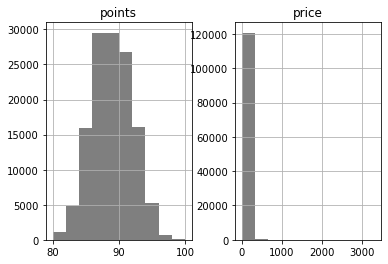

In [13]:
# Evaluando la distribución de los datos
df1.hist(color='k', alpha=0.5, bins=10)
plt.show()


<p> Distribución de puntaje => normal; mientras que distribución de precios está a la izquierda, mayoría tiene precios bajos </p>

In [21]:
# Cambiando los precios de variable numérica a categórica
bins = [0,300,500,1000,2000,3300]
names = ["0-300","301-500","501-1000","1001-2000","2001-3300"]
df["price"] = pd.cut(df["price"], bins, labels = names)
df.iloc[:, [1,5]]

TypeError: '<' not supported between instances of 'float' and 'str'

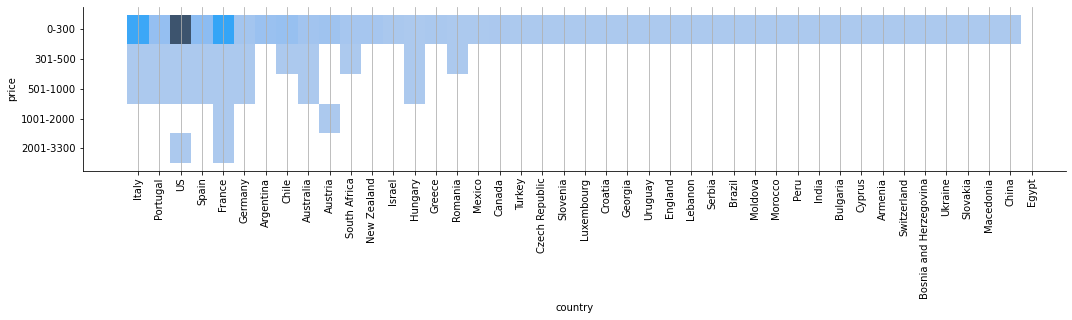

In [71]:
# Visualizando los rangos de precios por paises
sns.displot(x="country" , y="price", data=df, height = 3, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> Todos los paises tienen vinos en el rango de precio de 0-300, mientras que solo 12 paises tienen vinos que sobrepsan el limite de precio de 300 </p>

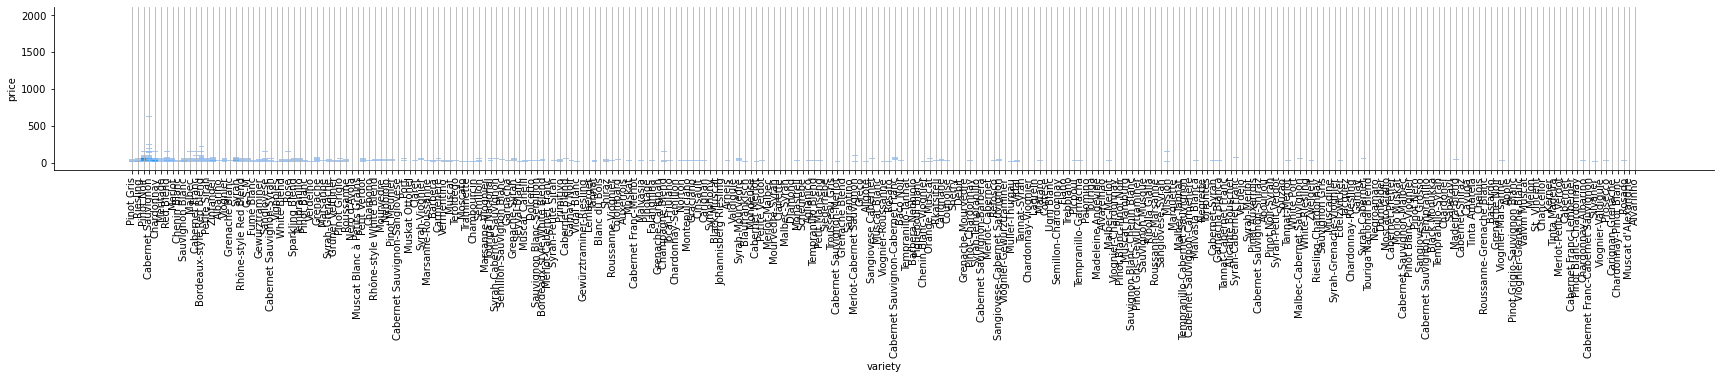

In [104]:
# Analizando variedad por precio
sns.displot(x="variety" , y="price", data=df2, height = 3, aspect = 8)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

In [108]:
# Analizando solo los vinos con precio mayor a 300
df3=df1 [df1["price"] > 300] 
df3.head()

,country,points,price,variety,winery
345,Australia,100,350.0,Muscat,Chambers Rosewood Vineyards
346,Australia,98,350.0,Muscadelle,Chambers Rosewood Vineyards
347,Germany,97,775.0,Riesling,Robert Weil
351,Hungary,96,320.0,Furmint,Oremus
353,France,96,630.0,Chardonnay,Louis Latour


In [109]:
df3.describe()

,points,price
count,316.000000,316.000000
mean,94.984177,526.310127
std,2.438397,337.737052
min,85.000000,301.000000
25%,94.000000,352.500000
50%,95.000000,450.000000
75%,96.000000,550.000000
max,100.000000,3300.000000


In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 345 to 128991
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  316 non-null    object 
 1   points   316 non-null    int64  
 2   price    316 non-null    float64
 3   variety  316 non-null    object 
 4   winery   316 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 14.8+ KB


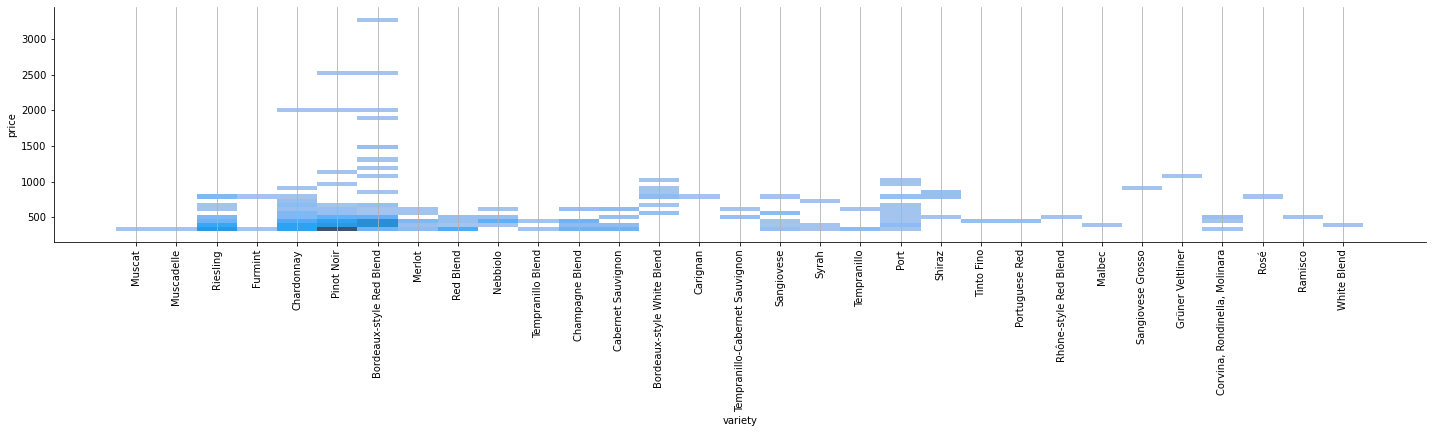

In [121]:
# Graficando los vinos >300 por precio y pais
sns.displot(x="variety" , y="price", data=df3, height = 4, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> La variedad Bordeaux-Style Red Blend es con la que se elaboran los vinos más caros, seguido de Pinnot Neir y Chardonnay. </p>

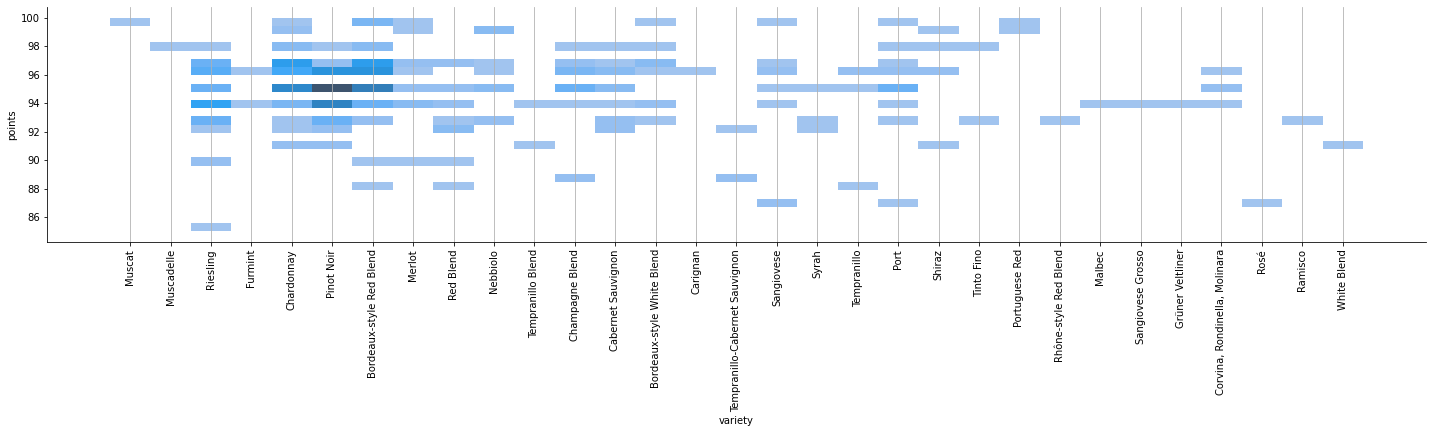

In [123]:
# Graficando los vinos >300 por puntaje y Variedad 
sns.displot(x="variety" , y="points", data=df3, height = 4, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> Hay variedades con puntaje de 100, que no necesariamente son los vinos más caros: Muscat, Merlot, Nebbiolo, Bordeaux Style White Blend, Port, Portugueses Red y Sangloveses. </p>

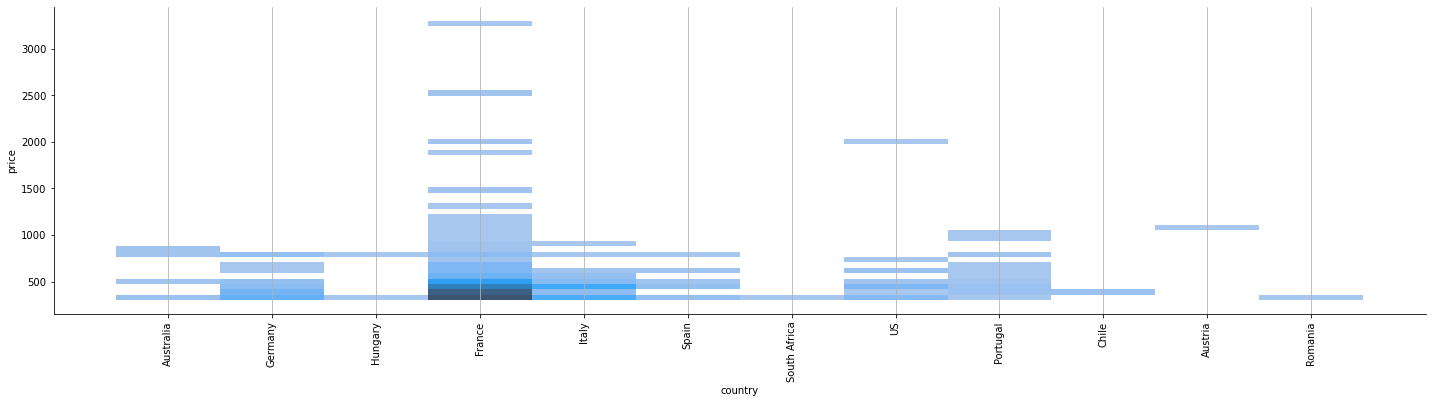

In [133]:
# Graficando los vinos >300 por precio y pais
sns.displot(x="country" , y="price", data=df3, height = 5, aspect = 4)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> Los vinos más caros se elaboran mayoritariamente en Francia.  </p>

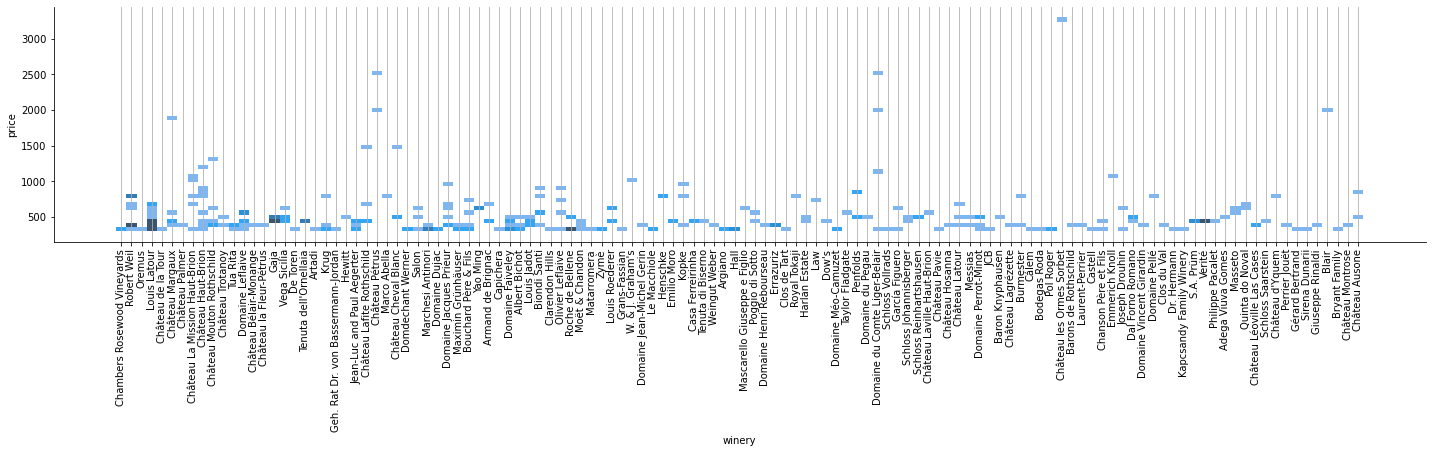

In [131]:
# Graficando los vinos >300 por precio y winery
sns.displot(x="winery" , y="price", data=df3, height = 4, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> Winery que vende el vino más caro es Chateu les Onmes Sorbet, seguida por otras dos bodegas francesas </p>

In [147]:
# Analizando solo los vinos de Francia
is_France = df3.loc[:, 'country'] == 'France'
df_France = df3.loc[is_France]
df_France.head()

,country,points,price,variety,winery
353,France,96,630.0,Chardonnay,Louis Latour
357,France,95,350.0,Pinot Noir,Château de la Tour
363,France,95,380.0,Chardonnay,Louis Latour
1558,France,98,1900.0,Bordeaux-style Red Blend,Château Margaux
1559,France,98,380.0,Bordeaux-style Red Blend,Château Palmer


In [148]:
df_France.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 353 to 127566
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  172 non-null    object 
 1   points   172 non-null    int64  
 2   price    172 non-null    float64
 3   variety  172 non-null    object 
 4   winery   172 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.1+ KB


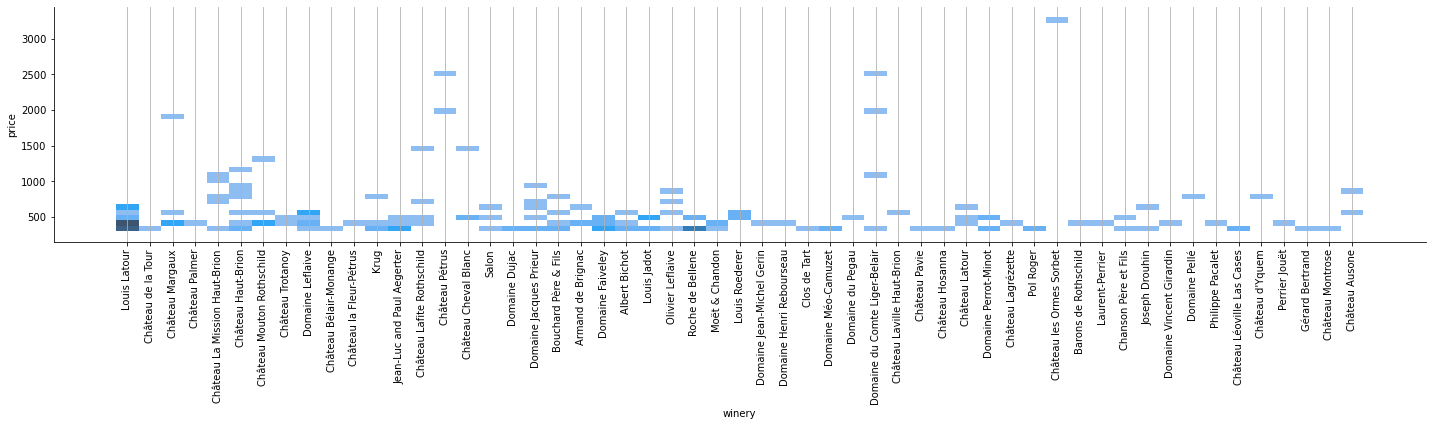

In [150]:
# Graficando los vinos franceses>300 por precio y region
sns.displot(x="winery" , y="price", data=df_France, height = 4, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()